#1. Importing necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, confusion_matrix,matthews_corrcoef
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
import warnings
warnings.filterwarnings('ignore')

#2.0 Dataset Description

### **Load dataset**

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/shafin027/CSE422_Project/refs/heads/main/adult%20income%20dataset.csv')

### **Summarize data**

In [ ]:
df.head(10)

,Age,Workclass,Final Weight,Education,Education Number of Years,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [ ]:
print ('Shape of the dataset is {}. This dataset contains {} rows and {} columns.'.format(df.shape,df.shape[0],df.shape[1]))

Shape of the dataset is (48842, 15). This dataset contains 48842 rows and 15 columns.


### **Features Names and Description**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        48842 non-null  int64 
 1   Workclass                  48842 non-null  object
 2   Final Weight               48842 non-null  int64 
 3   Education                  48842 non-null  object
 4   Education Number of Years  48842 non-null  int64 
 5   Marital-status             48842 non-null  object
 6   Occupation                 48842 non-null  object
 7   Relationship               48842 non-null  object
 8   Race                       48842 non-null  object
 9   Sex                        48842 non-null  object
 10  Capital-gain               48842 non-null  int64 
 11  Capital-loss               48842 non-null  int64 
 12  Hours-per-week             48842 non-null  int64 
 13  Native-country             48842 non-null  object
 14  target

### **Numerical Features**

In [ ]:
#Selecting numerical features

numerical_data = df.select_dtypes(include='number')

numerical_features=numerical_data.columns.tolist()

print(f'There are {len(numerical_features)} numerical features:', '\n')
print(numerical_features)

There are 6 numerical features: 

['Age', 'Final Weight', 'Education Number of Years', 'Capital-gain', 'Capital-loss', 'Hours-per-week']


### **Categorical Features**

In [ ]:
categorical_data=df.select_dtypes(include= 'object')
categorical_features=categorical_data.columns.tolist()

print(f'There are {len(categorical_features)} categorical features:', '\n')
print(categorical_features)

There are 9 categorical features: 

['Workclass', 'Education', 'Marital-status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native-country', 'target']


### **Descriptive Analysis of numerical features**

In [ ]:
numerical_data.describe().T.round()

,count,mean,std,min,25%,50%,75%,max
Age,48842.0,39.0,14.0,17.0,28.0,37.0,48.0,90.0
Final Weight,48842.0,189664.0,105604.0,12285.0,117550.0,178144.0,237642.0,1490400.0
Education Number of Years,48842.0,10.0,3.0,1.0,9.0,10.0,12.0,16.0
Capital-gain,48842.0,1079.0,7452.0,0.0,0.0,0.0,0.0,99999.0
Capital-loss,48842.0,88.0,403.0,0.0,0.0,0.0,0.0,4356.0
Hours-per-week,48842.0,40.0,12.0,1.0,40.0,40.0,45.0,99.0


### **Descriptive Analysis of Age with Target feature**

In [ ]:
print('Salary less than 50K')
print('percentage: ',round(df['target'].value_counts()[0]/len(df)*100,2))
print(round(df.Age[df.target == '<=50K'].describe(),2))

print('Salary Greater than 50K')
print('percentage: ',round(df['target'].value_counts()[1]/len(df)*100,2))
print(round(df.Age[df.target == '>50K'].describe(),2))

Salary less than 50K
percentage:  76.07
count    37155.00
mean        36.87
std         14.10
min         17.00
25%         25.00
50%         34.00
75%         46.00
max         90.00
Name: Age, dtype: float64
Salary Greater than 50K
percentage:  23.93
count    11687.00
mean        44.28
std         10.56
min         19.00
25%         36.00
50%         43.00
75%         51.00
max         90.00
Name: Age, dtype: float64


### **Check imbalance in the data**
#### We have classification problem so we need to check the balance of the given data.

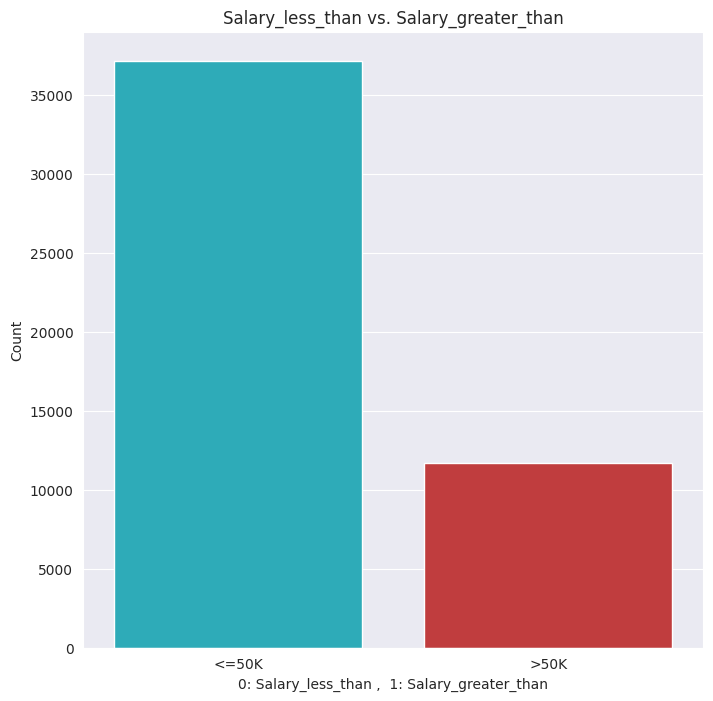

percentage of less than 50K:  76.07
percentage of greater than 50K:  23.93

The dataset is imbalanced, with significantly more instances in the '<=50K' class.


In [ ]:
plt.figure(figsize=(8,8))
sns.set_style('darkgrid')
sns.barplot(x=df['target'].value_counts().index,y=df['target'].value_counts(), palette=["C9", "C3"])
plt.title('Salary_less_than vs. Salary_greater_than')
plt.ylabel('Count')
plt.xlabel('0: Salary_less_than ,  1: Salary_greater_than')
plt.show()
print('percentage of less than 50K: ',round(df['target'].value_counts()[0]/len(df)*100,2))
print('percentage of greater than 50K: ',round(df['target'].value_counts()[1]/len(df)*100,2))
print("\nThe dataset is imbalanced, with significantly more instances in the '<=50K' class.")

### **Data visualization**
#### Some other visualizations of features to get more insights

### **Barplot of unique categorical features**

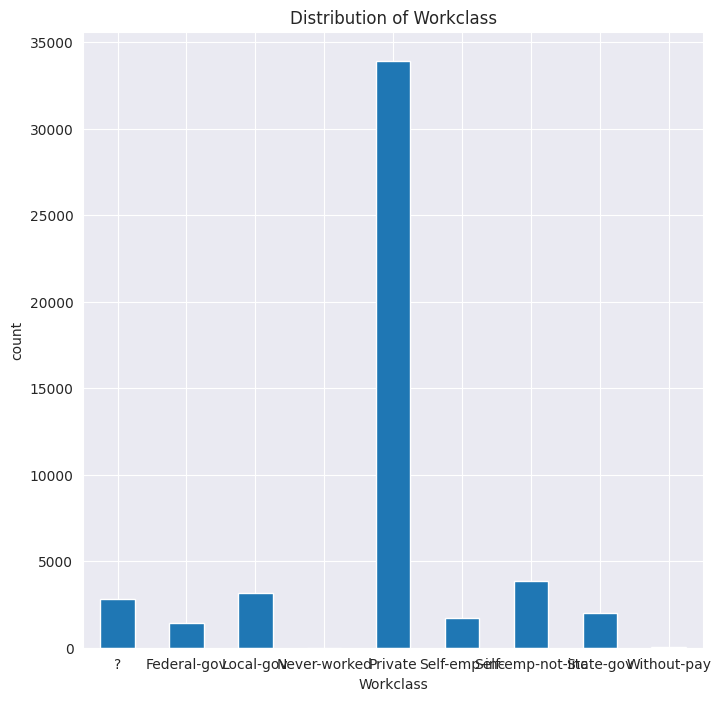

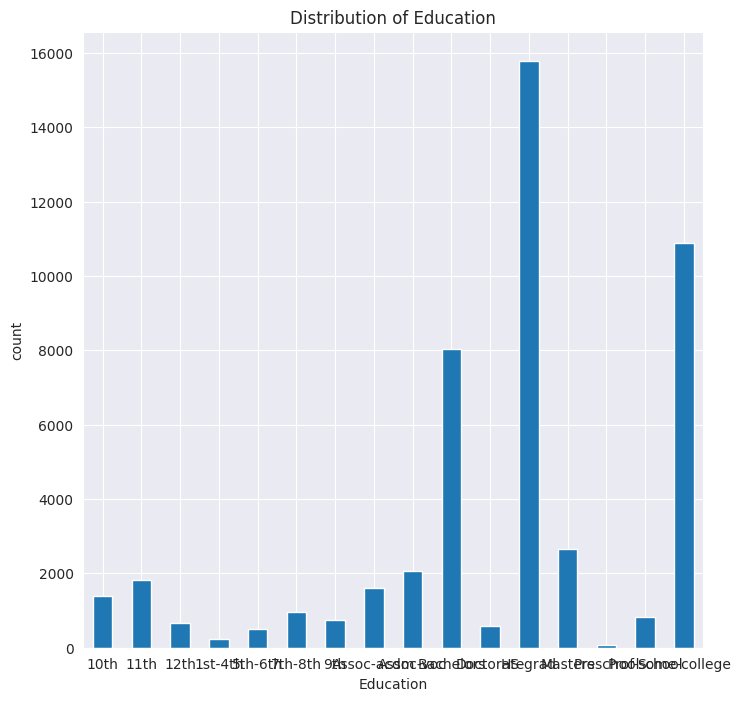

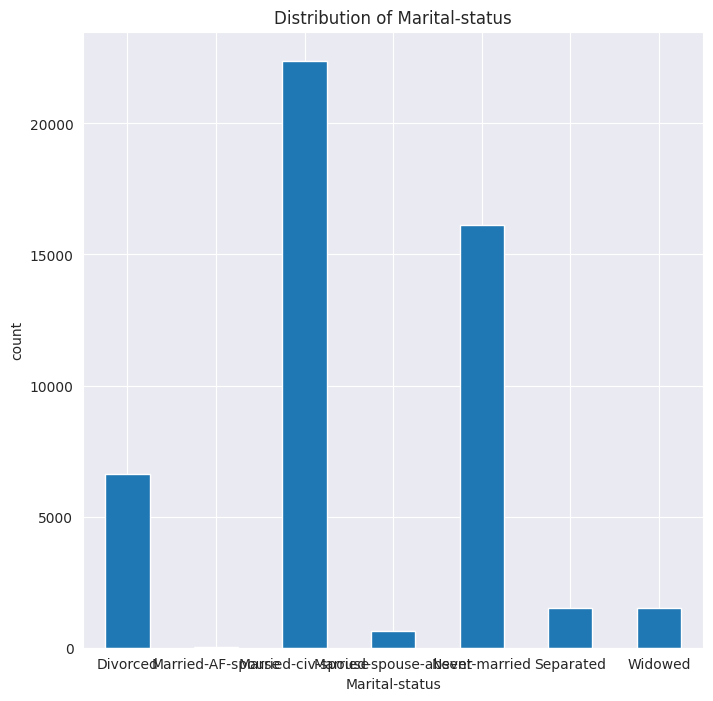

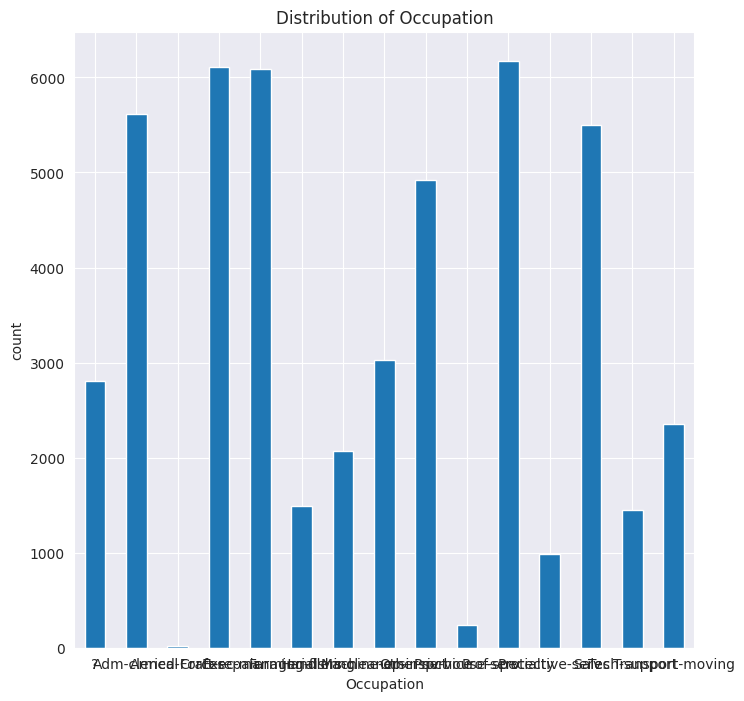

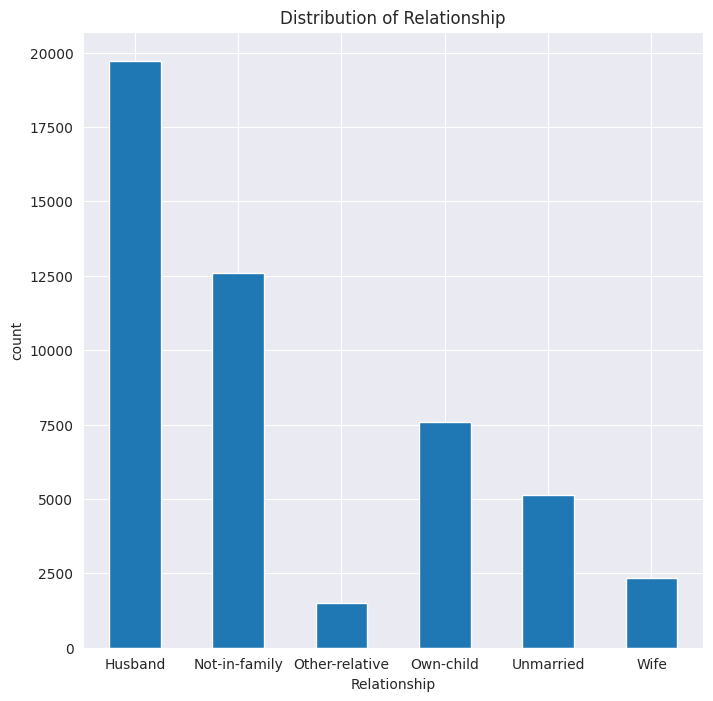

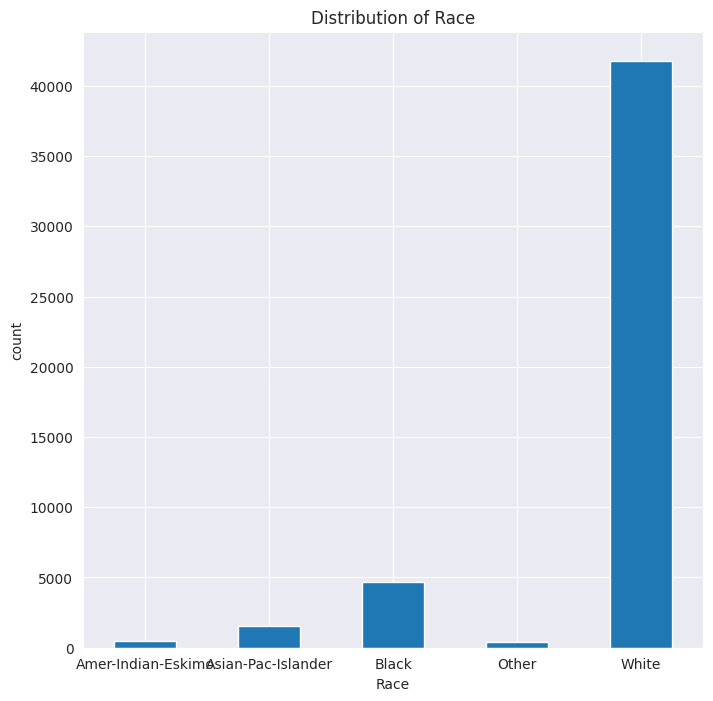

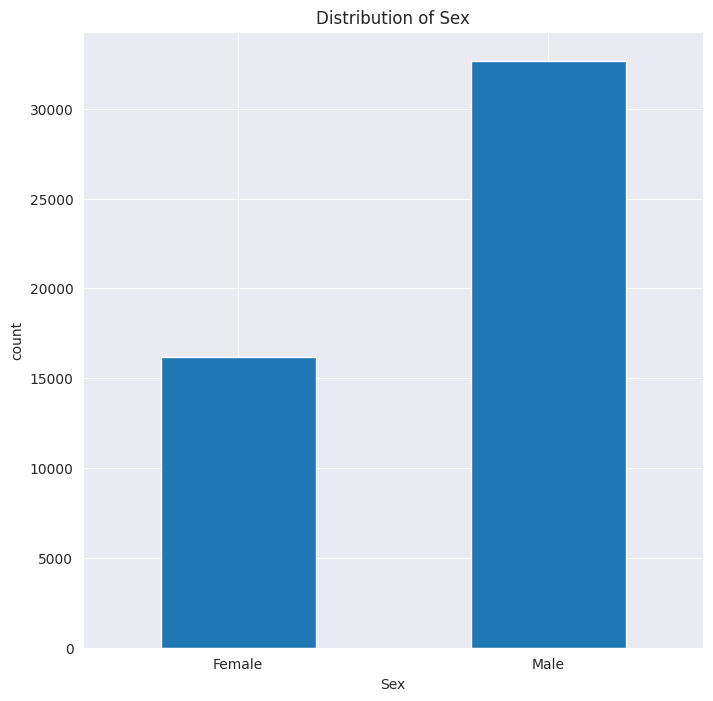

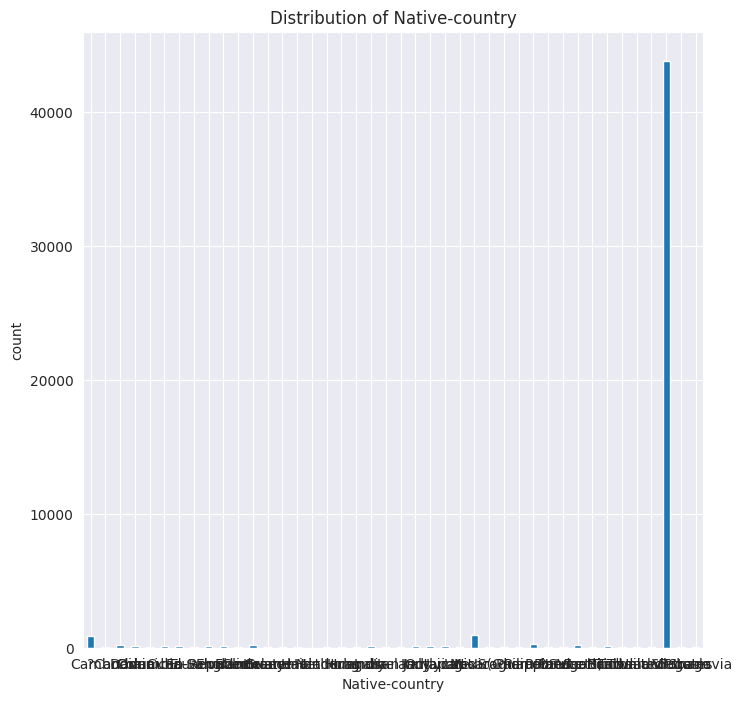

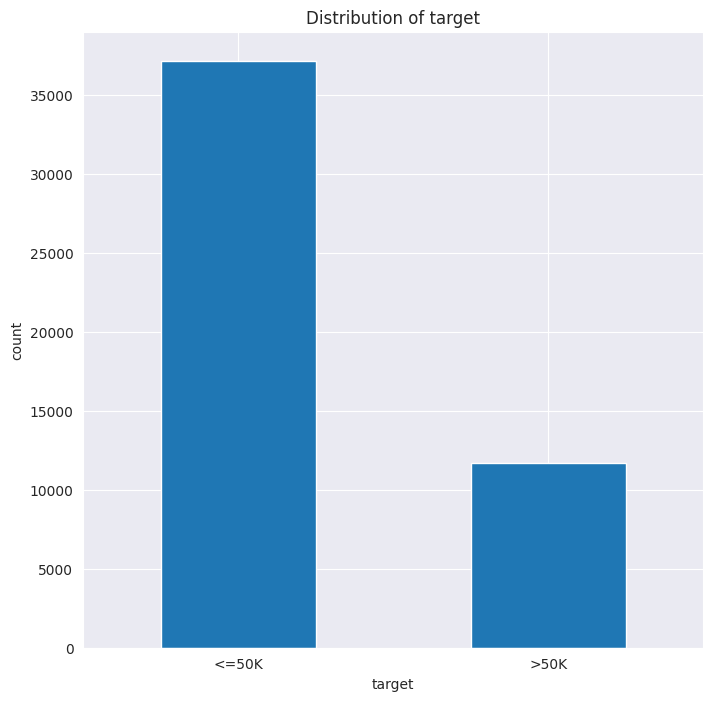

In [ ]:
for col in categorical_features:
    plt.figure(figsize=(8, 8)) # Increased figure size
    plt.title(f'Distribution of {col}')
    categorical_data[col].value_counts().sort_index().plot(kind='bar', rot=0, xlabel=col,ylabel='count')
    plt.show()

### **Density plots of numerical features**

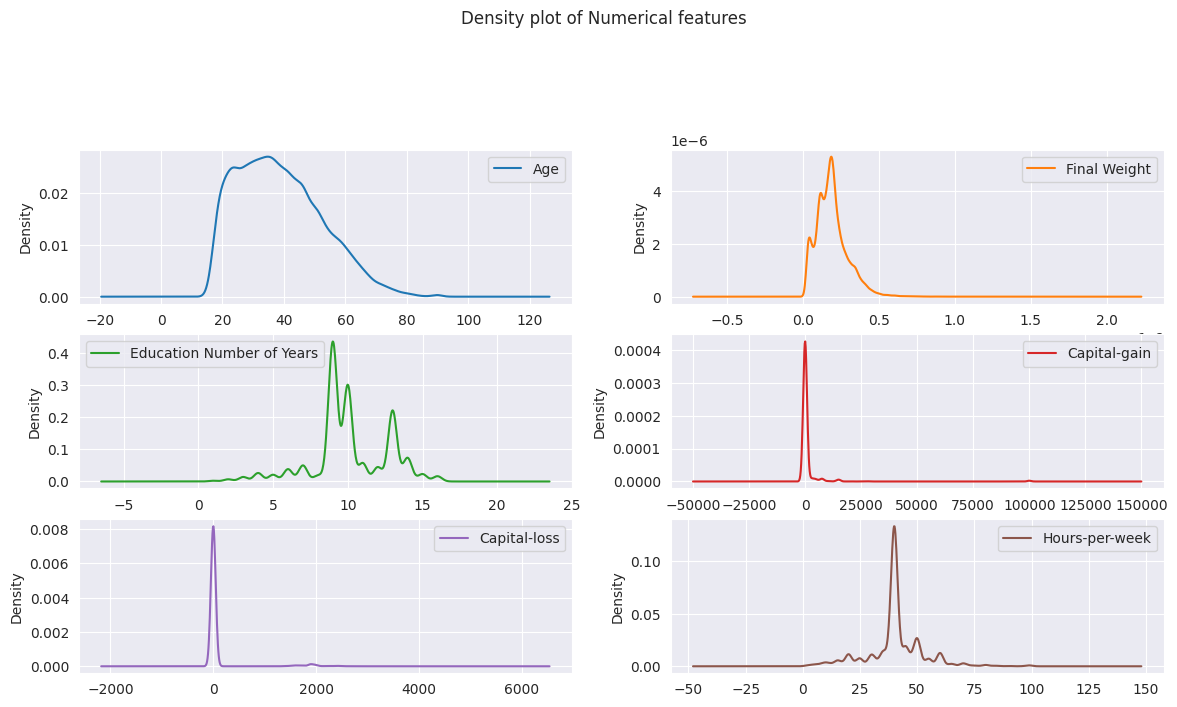

In [ ]:
numerical_data.plot(kind='density',figsize=(14,14),subplots=True,layout=(6,2),title="Density plot of Numerical features",sharex=False)
plt.show()

# 3. Dataset pre-processing

### **The dataset contains '?' for missing values in some object columns. Let's replace them with NaN.**

In [ ]:
df.replace('?', np.nan, inplace=True)

### **Missing values**

In [ ]:
print(df.isnull().sum())
print(f"Total null values: {df.isnull().sum().sum()}")

Age                             0
Workclass                    2799
Final Weight                    0
Education                       0
Education Number of Years       0
Marital-status                  0
Occupation                   2809
Relationship                    0
Race                            0
Sex                             0
Capital-gain                    0
Capital-loss                    0
Hours-per-week                  0
Native-country                857
target                          0
dtype: int64
Total null values: 6465


### **Handling Missing Values**

In [ ]:
# Handling Missing Values in Categorical Columns (Workclass, Occupation, Native-country)

# Impute missing values in categorical columns with the mode (most frequent value)
for col in ['Workclass', 'Occupation', 'Native-country']:
    if df[col].isnull().any():
        mode_value = df[col].mode()[0]
        df[col] = df[col].fillna(mode_value) # Modified line to avoid the warning

# Verify that there are no more missing values
print("\nMissing values after imputation:")
print(df.isnull().sum())


Missing values after imputation:
Age                          0
Workclass                    0
Final Weight                 0
Education                    0
Education Number of Years    0
Marital-status               0
Occupation                   0
Relationship                 0
Race                         0
Sex                          0
Capital-gain                 0
Capital-loss                 0
Hours-per-week               0
Native-country               0
target                       0
dtype: int64


### **Reasoning for Imputing Missing Categorical Values with Mode**

For the categorical columns with missing values (**'Workclass'**, **'Occupation'**, and **'Native-country'**), imputing with the **mode** (the most frequent value) is a suitable strategy. This approach is often used for categorical data as it replaces missing values with the most commonly occurring category, preserving the overall distribution of the categories. While other methods like using a constant value ('Unknown') or more advanced imputation techniques could be considered, using the mode is a reasonable and widely accepted method when there's no specific information about why the data is missing.

After these imputation steps, all missing values in the identified columns have been handled.

In [ ]:
categorical = df.select_dtypes(include = ['object','category']).columns
if(len(categorical) == 0):
  print(f"Categorical columns : 0")
else:
  print(f"Categorical Columns: {categorical}")
numeric = df.select_dtypes(include=['int64', 'float64']).columns
print(f"Numerical Columns: {numeric}")

Categorical Columns: Index(['Workclass', 'Education', 'Marital-status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native-country', 'target'],
      dtype='object')
Numerical Columns: Index(['Age', 'Final Weight', 'Education Number of Years', 'Capital-gain',
       'Capital-loss', 'Hours-per-week'],
      dtype='object')


### **Encoding Categorical Values**

In [ ]:
encoded = df.copy()
lencoder = LabelEncoder()
for c in categorical:
  unique = encoded[c].nunique()
  if unique == 2: #For two unique features
    print(f"Label endcoding the {c} column")
    encoded[c] = lencoder.fit_transform(encoded[c])
  else:           #For more than two unique features
    print(f"One hot encoding the {c} column")
    one_hot = pd.get_dummies(encoded[c], prefix=c)
    encoded = pd.concat([encoded.drop(c, axis = 1),one_hot], axis = 1)
encoded.head()

One hot encoding the Workclass column
One hot encoding the Education column
One hot encoding the Marital-status column
One hot encoding the Occupation column
One hot encoding the Relationship column
One hot encoding the Race column
Label endcoding the Sex column
One hot encoding the Native-country column
Label endcoding the target column


,Age,Final Weight,Education Number of Years,Sex,Capital-gain,Capital-loss,Hours-per-week,target,Workclass_Federal-gov,Workclass_Local-gov,...,Native-country_Portugal,Native-country_Puerto-Rico,Native-country_Scotland,Native-country_South,Native-country_Taiwan,Native-country_Thailand,Native-country_Trinadad&Tobago,Native-country_United-States,Native-country_Vietnam,Native-country_Yugoslavia
0,39,77516,13,1,2174,0,40,0,False,False,...,False,False,False,False,False,False,False,True,False,False
1,50,83311,13,1,0,0,13,0,False,False,...,False,False,False,False,False,False,False,True,False,False
2,38,215646,9,1,0,0,40,0,False,False,...,False,False,False,False,False,False,False,True,False,False
3,53,234721,7,1,0,0,40,0,False,False,...,False,False,False,False,False,False,False,True,False,False
4,28,338409,13,0,0,0,40,0,False,False,...,False,False,False,False,False,False,False,False,False,False


### **Correlation Heatmap plot of whole dataset**

In [ ]:
corelation_matrix = encoded.corr()
plt.figure(figsize=(100,100))
sns.heatmap(corelation_matrix, cmap = 'coolwarm', square = True, cbar = True, annot = False)
plt.title('Correlation Matrix', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### **Correlation Analysis**
The correlation heatmap reveals a few strong positive correlations and some negative correlations as well. For example, there is a strong positive correlation between Education Number of Years and the target variable, which means these values are proportional. On the other hand, there is a negative correlation between Capital-loss and the target variable, which means these are inversely proportional. So, the higher the capital loss, the lower the chances of having an income greater than $50,000.

### **Feature Engineering**

In [ ]:
scale = StandardScaler()
encoded[numeric] = scale.fit_transform(encoded[numeric])
print(f"Normalized numeric columns: {encoded[numeric].head()}")

Normalized numeric columns:         Age  Final Weight  Education Number of Years  Capital-gain  \
0  0.025996     -1.061979                   1.136512      0.146932   
1  0.828308     -1.007104                   1.136512     -0.144804   
2 -0.046942      0.246034                  -0.419335     -0.144804   
3  1.047121      0.426663                  -1.197259     -0.144804   
4 -0.776316      1.408530                   1.136512     -0.144804   

   Capital-loss  Hours-per-week  
0     -0.217127       -0.034087  
1     -0.217127       -2.213032  
2     -0.217127       -0.034087  
3     -0.217127       -0.034087  
4     -0.217127       -0.034087  


### **Remove noisy and unnecessary feature**




In [ ]:
drop_column = []

for col, val in corelation_matrix['target'].items():
    if (abs(val) < 0.05):
        drop_column.append(col)
print(drop_column)
for i in drop_column:
    encoded.drop(i, axis=1, inplace=True)

encoded.head(10)

['Final Weight', 'Workclass_Local-gov', 'Workclass_Never-worked', 'Workclass_Self-emp-not-inc', 'Workclass_State-gov', 'Workclass_Without-pay', 'Education_12th', 'Education_1st-4th', 'Education_5th-6th', 'Education_Assoc-acdm', 'Education_Assoc-voc', 'Education_Preschool', 'Marital-status_Married-AF-spouse', 'Marital-status_Married-spouse-absent', 'Occupation_Armed-Forces', 'Occupation_Craft-repair', 'Occupation_Priv-house-serv', 'Occupation_Protective-serv', 'Occupation_Sales', 'Occupation_Tech-support', 'Occupation_Transport-moving', 'Race_Amer-Indian-Eskimo', 'Race_Asian-Pac-Islander', 'Race_Other', 'Native-country_Cambodia', 'Native-country_Canada', 'Native-country_China', 'Native-country_Columbia', 'Native-country_Cuba', 'Native-country_Dominican-Republic', 'Native-country_Ecuador', 'Native-country_El-Salvador', 'Native-country_England', 'Native-country_France', 'Native-country_Germany', 'Native-country_Greece', 'Native-country_Guatemala', 'Native-country_Haiti', 'Native-country_H

,Age,Education Number of Years,Sex,Capital-gain,Capital-loss,Hours-per-week,target,Workclass_Federal-gov,Workclass_Private,Workclass_Self-emp-inc,...,Occupation_Prof-specialty,Relationship_Husband,Relationship_Not-in-family,Relationship_Other-relative,Relationship_Own-child,Relationship_Unmarried,Relationship_Wife,Race_Black,Race_White,Native-country_Mexico
0,0.025996,1.136512,1,0.146932,-0.217127,-0.034087,0,False,False,False,...,False,False,True,False,False,False,False,False,True,False
1,0.828308,1.136512,1,-0.144804,-0.217127,-2.213032,0,False,False,False,...,False,True,False,False,False,False,False,False,True,False
2,-0.046942,-0.419335,1,-0.144804,-0.217127,-0.034087,0,False,True,False,...,False,False,True,False,False,False,False,False,True,False
3,1.047121,-1.197259,1,-0.144804,-0.217127,-0.034087,0,False,True,False,...,False,True,False,False,False,False,False,True,False,False
4,-0.776316,1.136512,0,-0.144804,-0.217127,-0.034087,0,False,True,False,...,True,False,False,False,False,False,True,True,False,False
5,-0.119879,1.525474,0,-0.144804,-0.217127,-0.034087,0,False,True,False,...,False,False,False,False,False,False,True,False,True,False
6,0.755371,-1.975183,0,-0.144804,-0.217127,-1.970927,0,False,True,False,...,False,False,True,False,False,False,False,True,False,False
7,0.974183,-0.419335,1,-0.144804,-0.217127,0.369421,1,False,False,False,...,False,True,False,False,False,False,False,False,True,False
8,-0.557504,1.525474,0,1.745173,-0.217127,0.772930,1,False,True,False,...,True,False,True,False,False,False,False,False,True,False
9,0.244808,1.136512,1,0.550049,-0.217127,-0.034087,1,False,True,False,...,False,True,False,False,False,False,False,False,True,False


# 4. Dataset Splitting
Using stratified method for dividing the datasets as the dataset is imbalanced

In [ ]:
# Separate features (X) and target (y)
y = encoded['target']
X = encoded.drop('target', axis = 1)
# Split data into training and testing sets with a 70/30 ratio and stratify by the target variable
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=42, stratify=y )
print(f"Training set: {X_train.shape}")
print(f"Testing set: {X_test.shape}")

Training set: (34189, 40)
Testing set: (14653, 40)


# 5. Model Training and Testing
Supervised Learning Phase

###**Naive Bayes**

Accuracy: 0.781273459359858
Precision: 0.5268702017496876
Recall: 0.8416999429549344
F1 Score: 0.6480729109476228
MCC: 0.530265894801619
ROC AUC: 0.8773169920142537


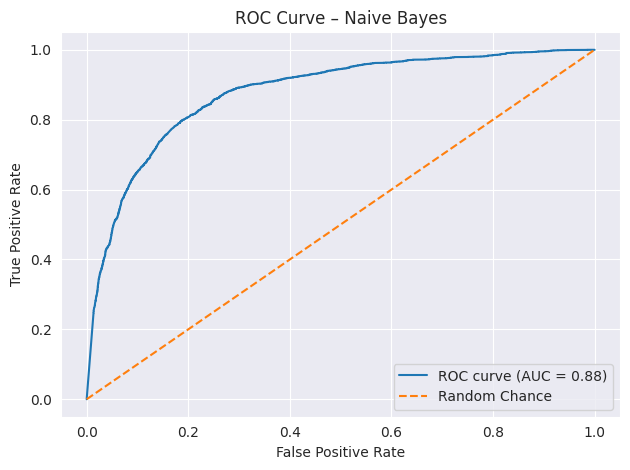

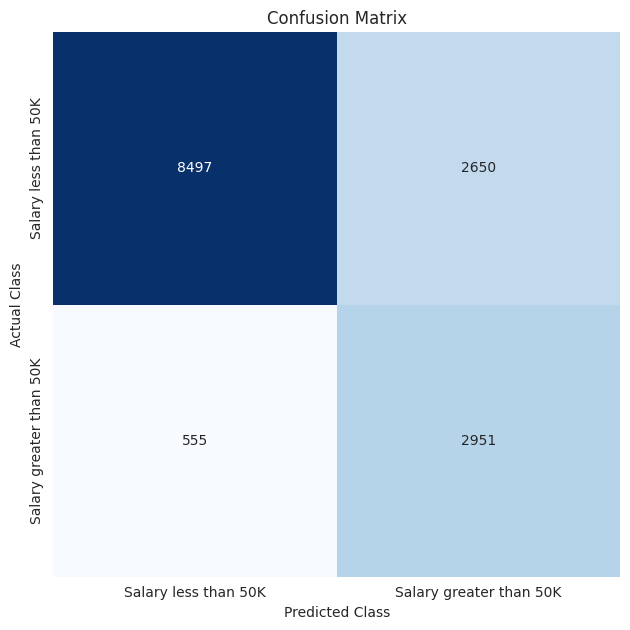

In [ ]:
model = GaussianNB()
model.fit(X_train, y_train)
y_pred_nb = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb)}")
print(f"Precision: {precision_score(y_test, y_pred_nb)}")
print(f"Recall: {recall_score(y_test, y_pred_nb)}")
print(f"F1 Score: {f1_score(y_test, y_pred_nb)}")
print(f"MCC: {matthews_corrcoef(y_test, y_pred_nb)}")
print(f"ROC AUC: {roc_auc_score(y_test, y_prob)}")

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve – Naive Bayes')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

LABELS = ['Salary less than 50K', 'Salary greater than 50K']

print()

conf_mtx = confusion_matrix(y_test, y_pred_nb)


plt.figure(figsize=(6.4, 6.4))
sns.heatmap(
    conf_mtx,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=LABELS,
    yticklabels=LABELS,
    cbar=False)
plt.title("Confusion Matrix")
plt.ylabel("Actual Class")
plt.xlabel("Predicted Class")
plt.tight_layout()
plt.show()

### **Logistic Regression**

Accuracy: 0.850815532655429
Precision: 0.7379235760634463
Recall: 0.5838562464346834
F1 Score: 0.6519108280254777
MCC: 0.5648136758458444
ROC AUC: 0.9031722829044274


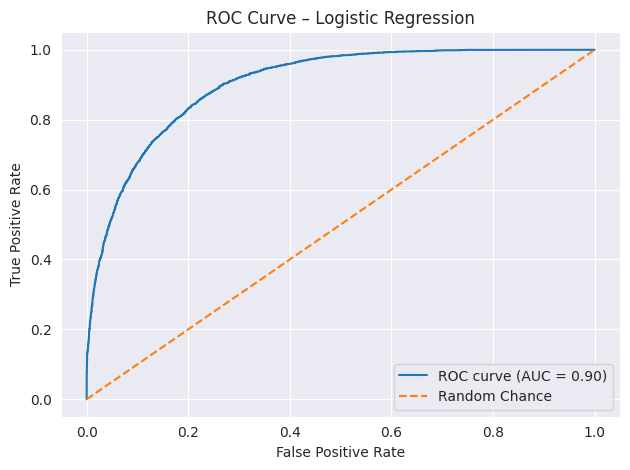

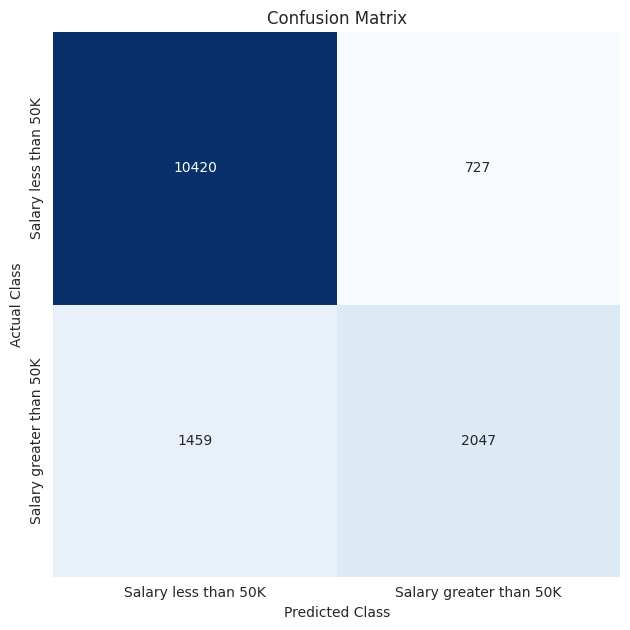

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred_lr = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr)}")
print(f"Precision: {precision_score(y_test, y_pred_lr)}")
print(f"Recall: {recall_score(y_test, y_pred_lr)}")
print(f"F1 Score: {f1_score(y_test, y_pred_lr)}")
print(f"MCC: {matthews_corrcoef(y_test, y_pred_lr)}")
print(f"ROC AUC: {roc_auc_score(y_test, y_prob)}")

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve – Logistic Regression')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

LABELS = ['Salary less than 50K', 'Salary greater than 50K']

print()

conf_mtx = confusion_matrix(y_test, y_pred_lr)


plt.figure(figsize=(6.4, 6.4))
sns.heatmap(
    conf_mtx,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=LABELS,
    yticklabels=LABELS,
    cbar=False)
plt.title("Confusion Matrix")
plt.ylabel("Actual Class")
plt.xlabel("Predicted Class")
plt.tight_layout()
plt.show()

### **Neural Network**

Improved MLPClassifier Results:
Accuracy: 0.8582
Precision: 0.7344
Recall: 0.6380
F1 Score: 0.6828
MCC: 0.5945
ROC AUC: 0.9107


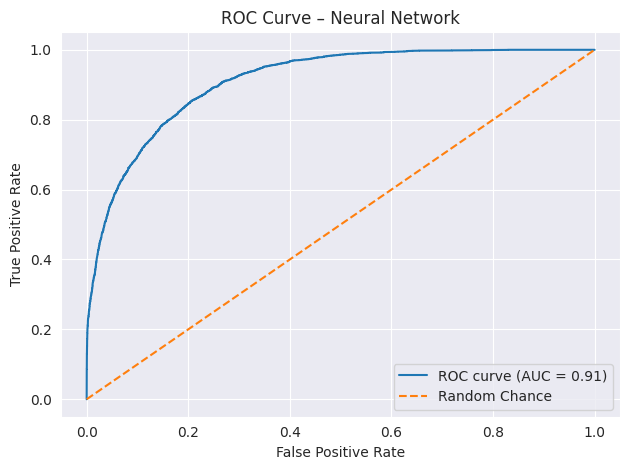

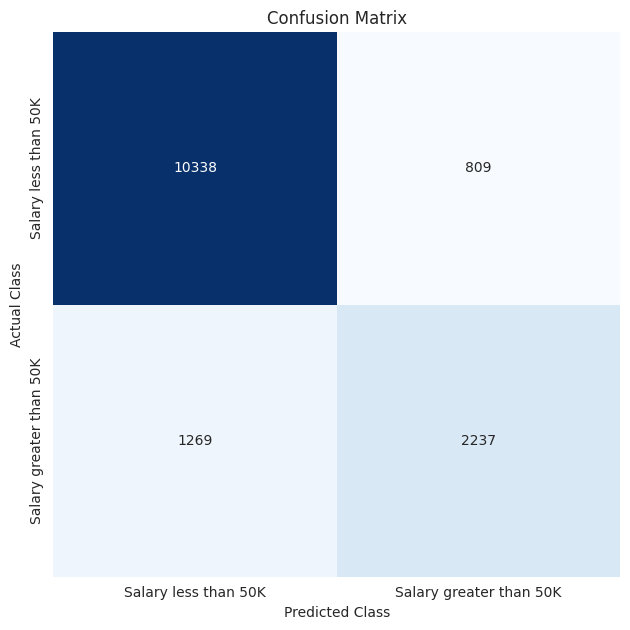

In [ ]:
mlp = MLPClassifier(
  hidden_layer_sizes=(128, 64, 32),
  activation='relu',
  solver='adam',
  alpha=0.001,
  learning_rate_init=0.001,
  max_iter=2000,
  early_stopping=True,
  validation_fraction=0.1,
  n_iter_no_change=10,
  random_state=42
)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)
y_prob_mlp = mlp.predict_proba(X_test)[:, 1]
print("Improved MLPClassifier Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_mlp):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_mlp):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_mlp):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_mlp):.4f}")
print(f"MCC: {matthews_corrcoef(y_test, y_pred_mlp):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_prob_mlp):.4f}")

fpr, tpr, thresholds = roc_curve(y_test, y_prob_mlp)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve – Neural Network')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

LABELS = ['Salary less than 50K', 'Salary greater than 50K']

print()

conf_mtx = confusion_matrix(y_test, y_pred_mlp)


plt.figure(figsize=(6.4, 6.4))
sns.heatmap(
    conf_mtx,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=LABELS,
    yticklabels=LABELS,
    cbar=False)
plt.title("Confusion Matrix")
plt.ylabel("Actual Class")
plt.xlabel("Predicted Class")
plt.tight_layout()
plt.show()

### **Unsupervised Learning Phase**

Data shape: (48842, 40)
Features: ['Age', 'Education Number of Years', 'Sex', 'Capital-gain', 'Capital-loss', 'Hours-per-week', 'Workclass_Federal-gov', 'Workclass_Private', 'Workclass_Self-emp-inc', 'Education_10th', 'Education_11th', 'Education_7th-8th', 'Education_9th', 'Education_Bachelors', 'Education_Doctorate', 'Education_HS-grad', 'Education_Masters', 'Education_Prof-school', 'Education_Some-college', 'Marital-status_Divorced', 'Marital-status_Married-civ-spouse', 'Marital-status_Never-married', 'Marital-status_Separated', 'Marital-status_Widowed', 'Occupation_Adm-clerical', 'Occupation_Exec-managerial', 'Occupation_Farming-fishing', 'Occupation_Handlers-cleaners', 'Occupation_Machine-op-inspct', 'Occupation_Other-service', 'Occupation_Prof-specialty', 'Relationship_Husband', 'Relationship_Not-in-family', 'Relationship_Other-relative', 'Relationship_Own-child', 'Relationship_Unmarried', 'Relationship_Wife', 'Race_Black', 'Race_White', 'Native-country_Mexico']
PCA explained vari

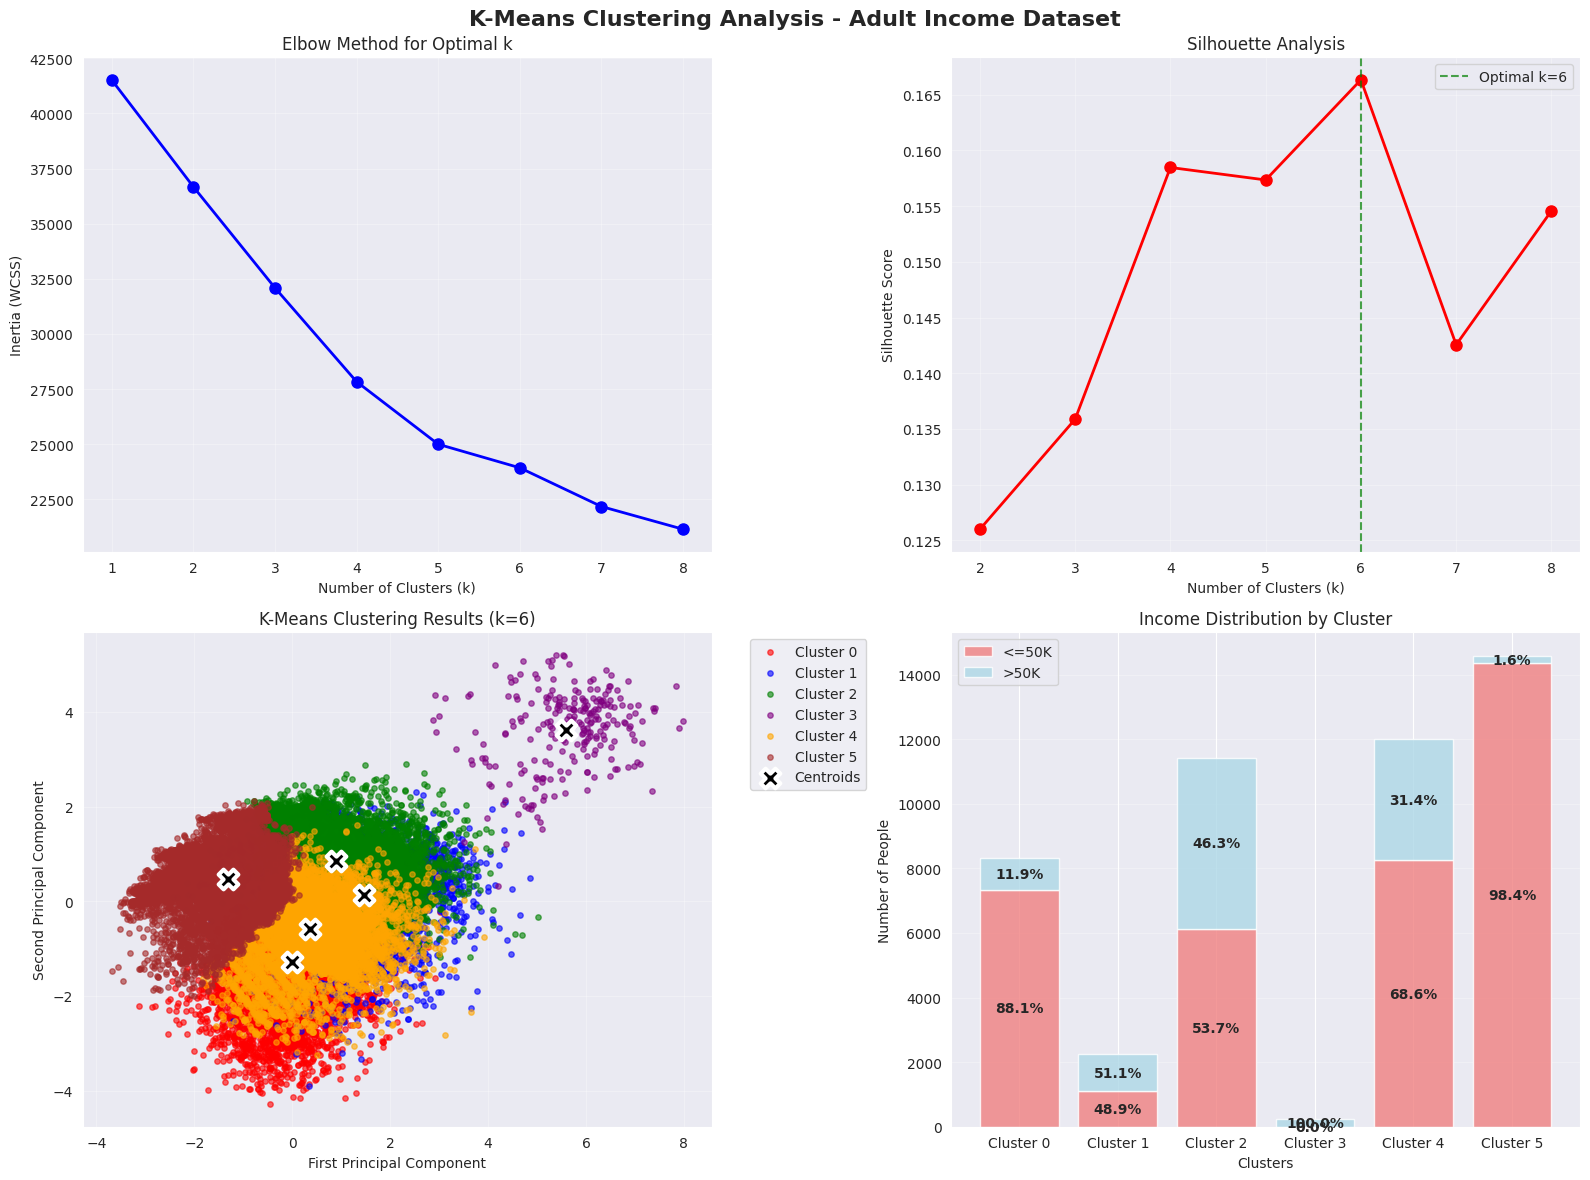

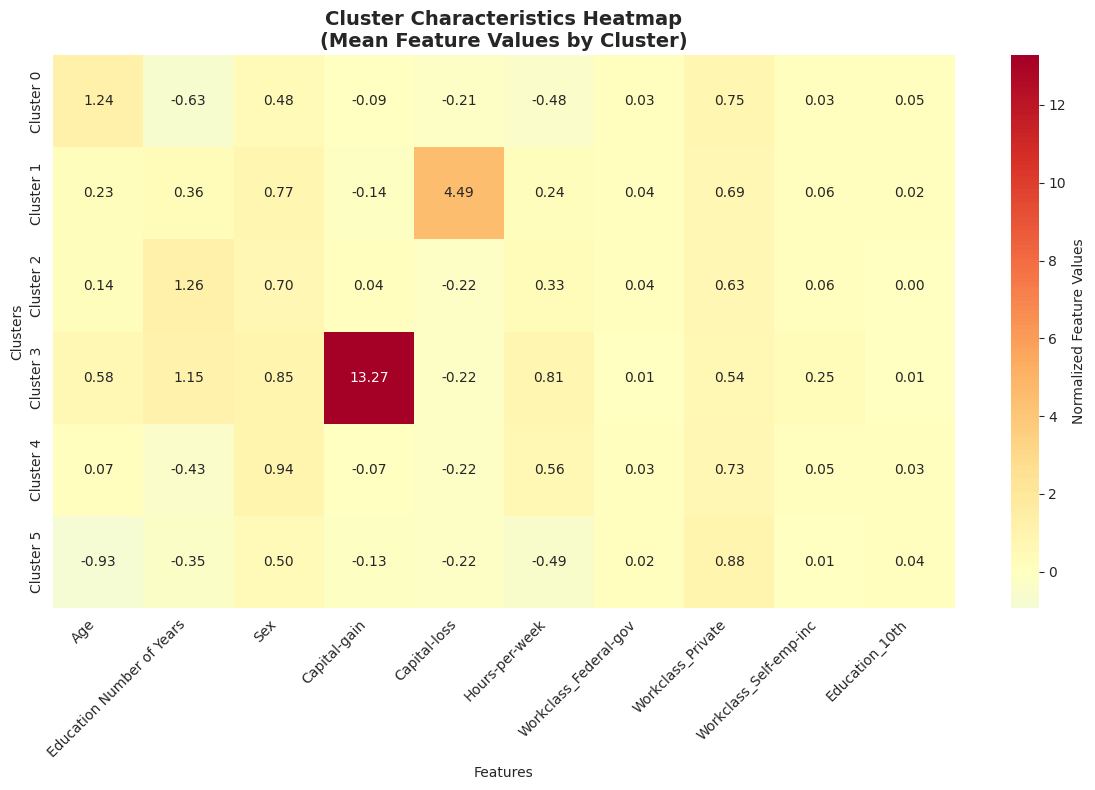

Dataset: 48,842 samples, 40 features
Optimal clusters: 6
Silhouette score: 0.152
Final inertia: 227075.85
PCA variance explained: 31.5%
Cluster 0: 8,330 people (17.1%) - Low income (11.9% >50K)
Cluster 1: 2,237 people (4.6%) - High income (51.1% >50K)
Cluster 2: 11,433 people (23.4%) - High income (46.3% >50K)
Cluster 3: 244 people (0.5%) - High income (100.0% >50K)
Cluster 4: 12,018 people (24.6%) - Mixed income (31.4% >50K)
Cluster 5: 14,580 people (29.9%) - Low income (1.6% >50K)


In [ ]:

from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
X_clustering = encoded.drop('target', axis=1)
y_clustering = encoded['target']
print(f"Data shape: {X_clustering.shape}")
print(f"Features: {list(X_clustering.columns)}")

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_clustering)

print(f"PCA explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Total variance explained: {sum(pca.explained_variance_ratio_):.3f}")

sample_size = 5000
np.random.seed(42)
if len(X_clustering) > sample_size:
    sample_idx = np.random.choice(len(X_clustering), sample_size, replace=False)
    X_sample = X_clustering.iloc[sample_idx]
    print(f"Using sample of {sample_size} points for optimization")
else:
    X_sample = X_clustering
    print("Using full dataset")

k_range = range(1, 9)
inertias = []

for k in k_range:
    if k == 1:
        inertia = np.sum((X_sample - X_sample.mean())**2).sum()
    else:
        kmeans_temp = KMeans(n_clusters=k, init='k-means++',
                           n_init=10, random_state=42)
        kmeans_temp.fit(X_sample)
        inertia = kmeans_temp.inertia_

    inertias.append(inertia)
    print(f"  k={k}: Inertia = {inertia:.2f}")

k_range_sil = range(2, 9)
silhouette_scores = []

for k in k_range_sil:
    kmeans_temp = KMeans(n_clusters=k, init='k-means++',
                       n_init=10, random_state=42)
    labels_temp = kmeans_temp.fit_predict(X_sample)
    sil_score = silhouette_score(X_sample, labels_temp)
    silhouette_scores.append(sil_score)
    print(f"  k={k}: Silhouette Score = {sil_score:.3f}")
optimal_k = k_range_sil[np.argmax(silhouette_scores)]
best_silhouette = max(silhouette_scores)

final_kmeans = KMeans(
    n_clusters=optimal_k,
    init='k-means++',
    n_init=10,
    max_iter=300,
    tol=1e-4,
    random_state=42
)

final_kmeans.fit(X_clustering)

cluster_labels = final_kmeans.labels_
cluster_centers = final_kmeans.cluster_centers_
final_inertia = final_kmeans.inertia_

print(f"Final inertia: {final_inertia:.2f}")
print(f"Converged in: {final_kmeans.n_iter_} iterations")

unique_clusters, counts = np.unique(cluster_labels, return_counts=True)
print("\nCluster Distribution:")
for cluster, count in zip(unique_clusters, counts):
    percentage = (count / len(cluster_labels)) * 100
    print(f"  Cluster {cluster}: {count:,} points ({percentage:.1f}%)")

final_silhouette = silhouette_score(X_clustering, cluster_labels)
print(f"\nClustering Quality:")
print(f"  Silhouette Score: {final_silhouette:.3f}")
print(f"  Final Inertia: {final_inertia:.2f}")

for cluster in unique_clusters:
    cluster_mask = cluster_labels == cluster
    cluster_income = y_clustering[cluster_mask]

    low_income = (cluster_income == 0).sum()
    high_income = (cluster_income == 1).sum()
    total = len(cluster_income)

    print(f"\nCluster {cluster} ({total:,} people):")
    print(f"  <=50K: {low_income:,} ({low_income/total*100:.1f}%)")
    print(f"  >50K:  {high_income:,} ({high_income/total*100:.1f}%)")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('K-Means Clustering Analysis - Adult Income Dataset',
             fontsize=16, fontweight='bold')

axes[0, 0].plot(k_range, inertias, 'bo-', linewidth=2, markersize=8)
axes[0, 0].set_title('Elbow Method for Optimal k')
axes[0, 0].set_xlabel('Number of Clusters (k)')
axes[0, 0].set_ylabel('Inertia (WCSS)')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].set_xticks(k_range)

axes[0, 1].plot(k_range_sil, silhouette_scores, 'ro-', linewidth=2, markersize=8)
axes[0, 1].axvline(x=optimal_k, color='green', linestyle='--', alpha=0.7,
                  label=f'Optimal k={optimal_k}')
axes[0, 1].set_title('Silhouette Analysis')
axes[0, 1].set_xlabel('Number of Clusters (k)')
axes[0, 1].set_ylabel('Silhouette Score')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].set_xticks(k_range_sil)
centers_pca = pca.transform(cluster_centers)
colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown', 'pink', 'gray']

for i, cluster in enumerate(unique_clusters):
    mask = cluster_labels == cluster
    axes[1, 0].scatter(X_pca[mask, 0], X_pca[mask, 1],
                      c=colors[i % len(colors)],
                      label=f'Cluster {cluster}',
                      alpha=0.6, s=15)

axes[1, 0].scatter(centers_pca[:, 0], centers_pca[:, 1],
                  c='black', marker='X', s=200, linewidths=3,
                  label='Centroids', edgecolors='white')

axes[1, 0].set_title(f'K-Means Clustering Results (k={optimal_k})')
axes[1, 0].set_xlabel('First Principal Component')
axes[1, 0].set_ylabel('Second Principal Component')
axes[1, 0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1, 0].grid(True, alpha=0.3)

cluster_names = [f'Cluster {i}' for i in unique_clusters]
low_income_counts = []
high_income_counts = []

for cluster in unique_clusters:
    cluster_mask = cluster_labels == cluster
    cluster_income = y_clustering[cluster_mask]

    low_count = (cluster_income == 0).sum()
    high_count = (cluster_income == 1).sum()

    low_income_counts.append(low_count)
    high_income_counts.append(high_count)

x_pos = np.arange(len(cluster_names))
axes[1, 1].bar(x_pos, low_income_counts, label='<=50K',
              color='lightcoral', alpha=0.8)
axes[1, 1].bar(x_pos, high_income_counts, bottom=low_income_counts,
              label='>50K', color='lightblue', alpha=0.8)

for i, (low, high) in enumerate(zip(low_income_counts, high_income_counts)):
    total = low + high
    low_pct = (low / total) * 100
    high_pct = (high / total) * 100

    axes[1, 1].text(i, low/2, f'{low_pct:.1f}%',
                   ha='center', va='center', fontweight='bold')
    axes[1, 1].text(i, low + high/2, f'{high_pct:.1f}%',
                   ha='center', va='center', fontweight='bold')

axes[1, 1].set_title('Income Distribution by Cluster')
axes[1, 1].set_xlabel('Clusters')
axes[1, 1].set_ylabel('Number of People')
axes[1, 1].set_xticks(x_pos)
axes[1, 1].set_xticklabels(cluster_names)
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

cluster_characteristics = []
feature_names = X_clustering.columns[:10]

for cluster in unique_clusters:
    cluster_mask = cluster_labels == cluster
    cluster_data = X_clustering[cluster_mask]
    cluster_means = cluster_data[feature_names].mean()
    cluster_characteristics.append(cluster_means)

cluster_char_df = pd.DataFrame(cluster_characteristics,
                              index=[f'Cluster {i}' for i in unique_clusters],
                              columns=feature_names)

plt.figure(figsize=(12, 8))
sns.heatmap(cluster_char_df, annot=True, cmap='RdYlBu_r', center=0,
           fmt='.2f', cbar_kws={'label': 'Normalized Feature Values'})
plt.title('Cluster Characteristics Heatmap\n(Mean Feature Values by Cluster)',
         fontsize=14, fontweight='bold')
plt.xlabel('Features')
plt.ylabel('Clusters')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print(f"Dataset: {len(X_clustering):,} samples, {X_clustering.shape[1]} features")
print(f"Optimal clusters: {optimal_k}")
print(f"Silhouette score: {final_silhouette:.3f}")
print(f"Final inertia: {final_inertia:.2f}")
print(f"PCA variance explained: {sum(pca.explained_variance_ratio_):.1%}")

for i, cluster in enumerate(unique_clusters):
    cluster_size = counts[i]
    percentage = (cluster_size / len(cluster_labels)) * 100

    cluster_mask = cluster_labels == cluster
    high_income_pct = (y_clustering[cluster_mask] == 1).sum() / cluster_size * 100

    income_level = "High" if high_income_pct > 40 else \
                  "Mixed" if high_income_pct > 20 else "Low"

    print(f"Cluster {cluster}: {cluster_size:,} people ({percentage:.1f}%) - "
          f"{income_level} income ({high_income_pct:.1f}% >50K)")

# 6. Model selection/Comparison analysis

Bar chart showcasing prediction accuracy

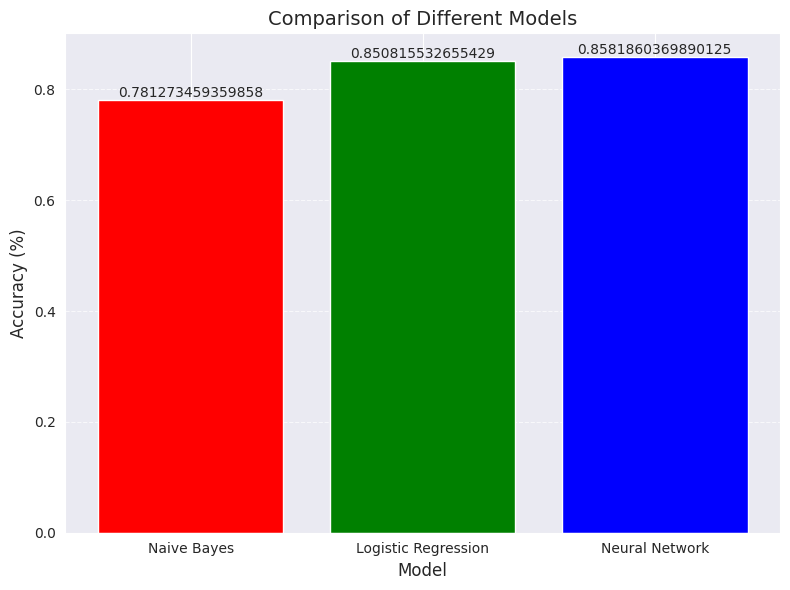

Overall neural network is ahead of performance than other models here


In [ ]:
model = ['Naive Bayes', 'Logistic Regression', 'Neural Network']
accuracy = [(accuracy_score(y_test, y_pred_nb)), (accuracy_score(y_test, y_pred_lr)), (accuracy_score(y_test, y_pred_mlp))]

plt.figure(figsize=(8, 6))
bars = plt.bar(model, accuracy, color=['red', 'green', 'blue'])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height}',
             ha='center', va='bottom')

plt.title('Comparison of Different Models', fontsize=14)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()
print("Overall neural network is ahead of performance than other models here")